In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [169]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
df=sns.load_dataset("tips")
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [84]:
df.shape

(244, 7)

In [85]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [87]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


#insight
describe given numerical np.columns
dataset have 244 records
no missing values in total_bill,tip,size

--total_bill--
avg
---



---



In [88]:
df.describe(include='category')

sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176

from typing import dataclass_transform
from pandas._config.config import Mode
from numpy._core import records
#null value treatments and imputation
A. Fill the missing records
     1. Mean Median Mode
     2. domain
B. Remove missing dataclass_transform
     1. Remove the rows in which missing position
        dropna data loss less than 20
     2. Remove the column in which missing positions

In [89]:
(df.isna().sum()/df.shape[0])*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [90]:
df=sns.load_dataset("titanic")
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [91]:
df.shape

(891, 15)

In [92]:
df.isna().sum() #find no. of missing values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [93]:
(df.isna().sum()/df.shape[0])*100 #percentage of missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [94]:
df.dropna() #it will not delete data permenantly remove records temporarily

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      1      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  embark_town alive  alone  
1    woman       False    C    Cherbourg   yes  False  
3    woman       False    C  Southampton   yes  False  
6      man        True    E  Southampton    no   True  
10   child       False    G  Southampton   yes  False  
11   woman       False    C  Southampton   yes   True  
..     ...         ...  ...          ...   ...    ...  
871  woman       False    D  Southampton   yes  False  
872    man        True    B  Southampton    no   True  
879  woman       False    C    Cherbourg   yes  False  
887  woman       False    B  Southampton   yes   True  
889    man        True    C    Cherbourg   yes   True  

[182 rows x 15 columns]

In [95]:
df.dropna().shape

(182, 15)

In [96]:
df.shape

(891, 15)

In [97]:
df.dropna().shape[0]

182

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [99]:
((891-182)/891)*100

79.57351290684625

In [100]:
((df.shape[0]-df.dropna().shape[0])/df.shape[0])*100 #loss percentage

79.57351290684625

deck perct of missing records is more than 20 or it is 77 percent ,we can remove deck

age - np.median
embark_town mode
embarked median/

# numerical values
survived
pclass
sibsp
parch
age
fare

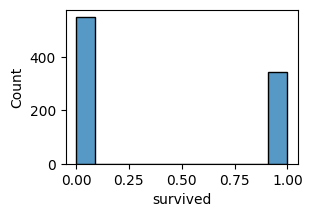

In [101]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'])
plt.show()

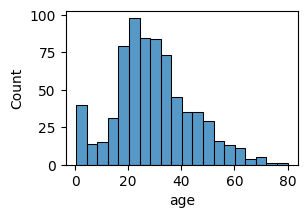

In [102]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'])
plt.show()

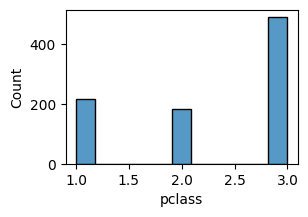

In [103]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'])
plt.show()

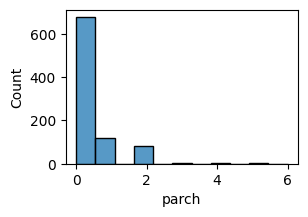

In [104]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'])
plt.show()

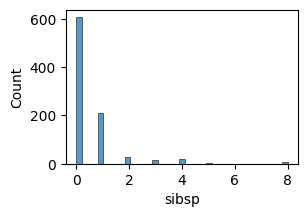

In [105]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'])
plt.show()

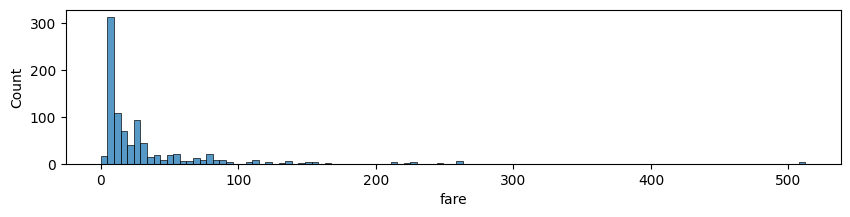

In [106]:
plt.figure(figsize=(10,2))
sns.histplot(x=df['fare'])
plt.show()

#categorical
sex
embarked
class
embark_town
who
deck
adult_male
alive
alone

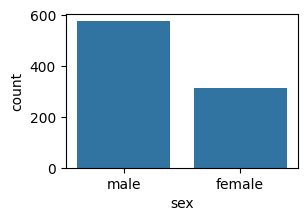

In [107]:
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'])
plt.show()

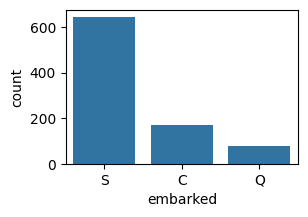

In [108]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['embarked'])
plt.show()

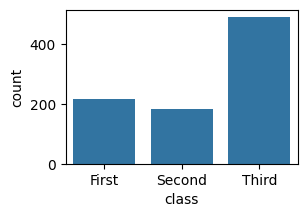

In [109]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['class'])
plt.show()

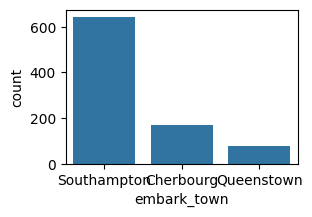

In [110]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['embark_town'])
plt.show()

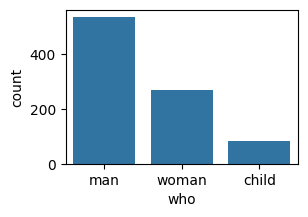

In [111]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['who'])
plt.show()

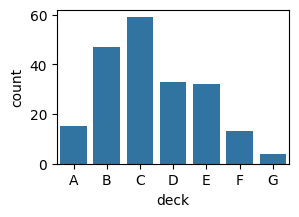

In [112]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['deck'])
plt.show()

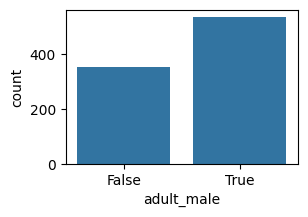

In [113]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['adult_male'])
plt.show()

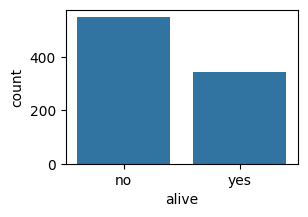

In [114]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['alive'])
plt.show()

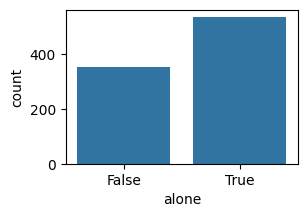

In [115]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['alone'])
plt.show()

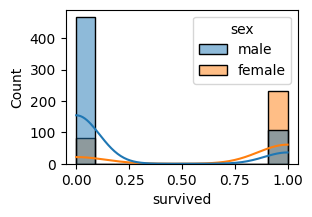

In [116]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['sex'],kde=True)
plt.show()

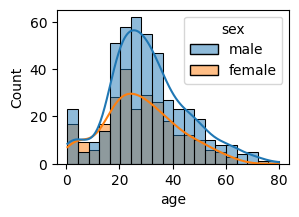

In [117]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['sex'],kde=True)
plt.show()

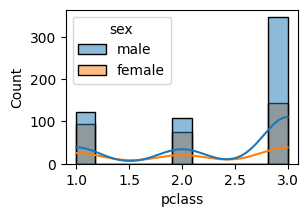

In [118]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['sex'],kde=True)
plt.show()

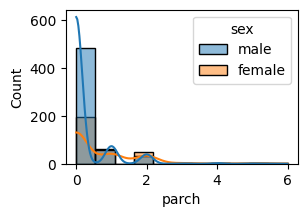

In [119]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['sex'],kde=True)
plt.show()

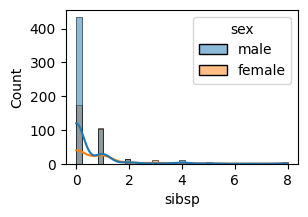

In [120]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['sex'],kde=True)
plt.show()

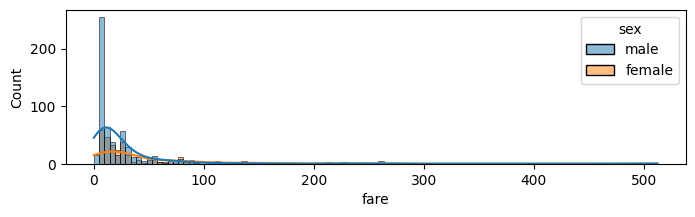

In [121]:
plt.figure(figsize=(8,2))
sns.histplot(x=df['fare'],hue=df['sex'],kde=True)
plt.show()

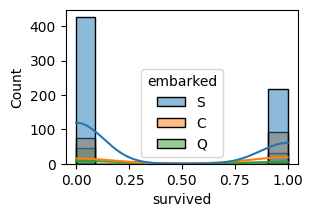

In [122]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['embarked'],kde=True)
plt.show()

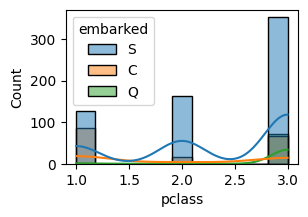

In [123]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['embarked'],kde=True)
plt.show()

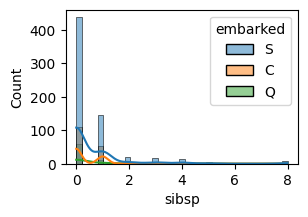

In [124]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['embarked'],kde=True)
plt.show()

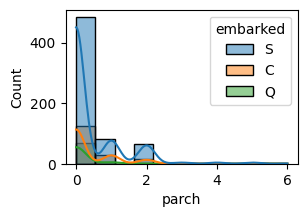

In [125]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['embarked'],kde=True)
plt.show()

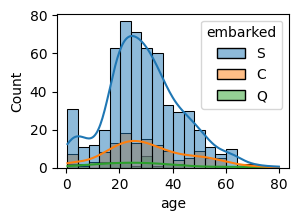

In [126]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['embarked'],kde=True)
plt.show()

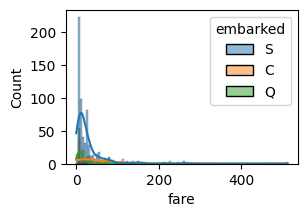

In [127]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['fare'],hue=df['embarked'],kde=True)
plt.show()

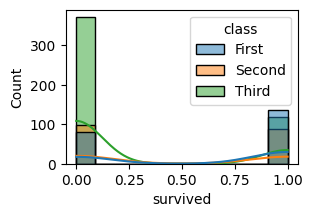

In [128]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['class'],kde=True)
plt.show()

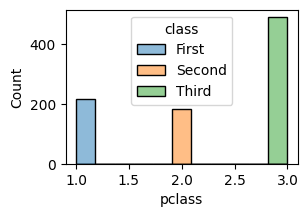

In [129]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['class'],kde=True)
plt.show()

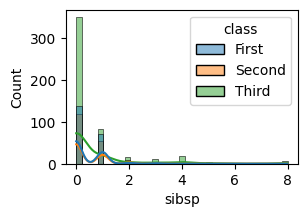

In [130]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['class'],kde=True)
plt.show()

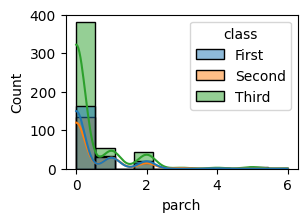

In [131]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['class'],kde=True)
plt.show()

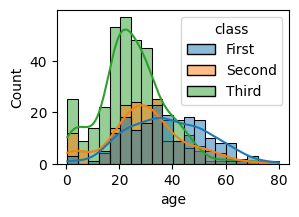

In [132]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['class'],kde=True)
plt.show()

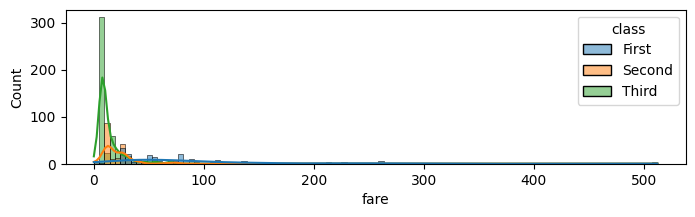

In [133]:
plt.figure(figsize=(8,2))
sns.histplot(x=df['fare'],hue=df['class'],kde=True)
plt.show()

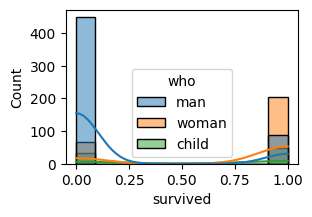

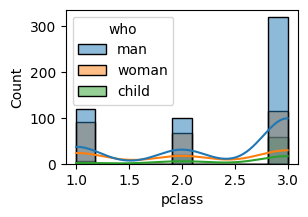

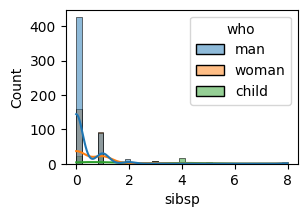

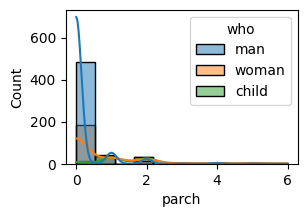

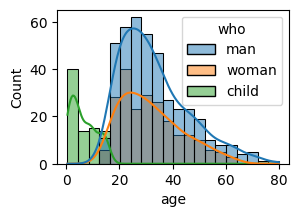

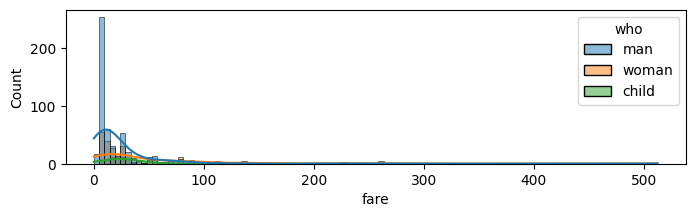

In [134]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['who'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['who'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['who'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['who'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['who'],kde=True)
plt.show()
plt.figure(figsize=(8,2))
sns.histplot(x=df['fare'],hue=df['who'],kde=True)
plt.show()

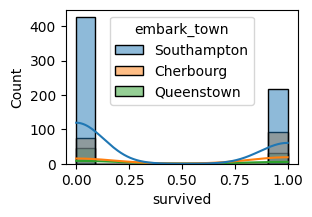

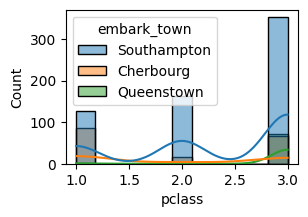

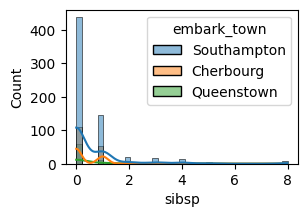

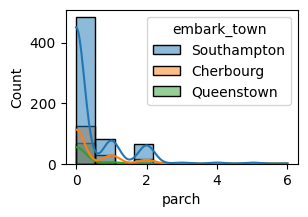

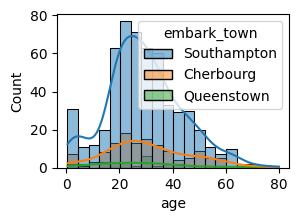

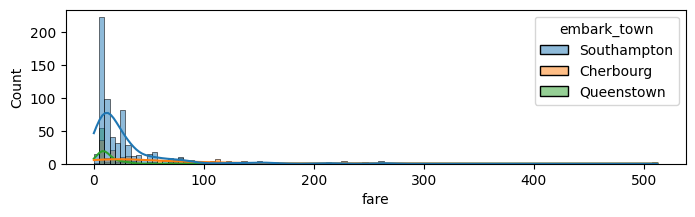

In [135]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['embark_town'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['embark_town'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['embark_town'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['embark_town'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['embark_town'],kde=True)
plt.show()
plt.figure(figsize=(8,2))
sns.histplot(x=df['fare'],hue=df['embark_town'],kde=True)
plt.show()

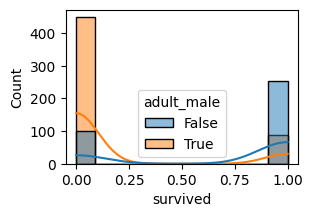

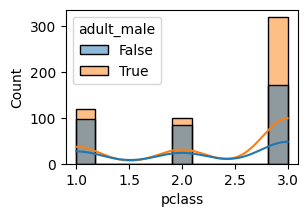

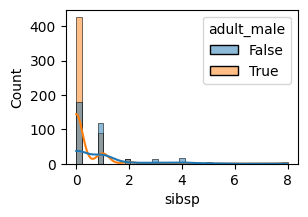

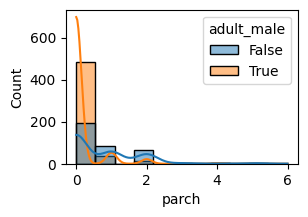

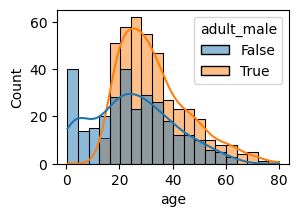

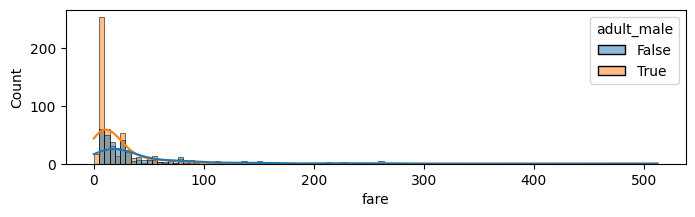

In [136]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['adult_male'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['adult_male'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['adult_male'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['adult_male'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['adult_male'],kde=True)
plt.show()
plt.figure(figsize=(8,2))
sns.histplot(x=df['fare'],hue=df['adult_male'],kde=True)
plt.show()

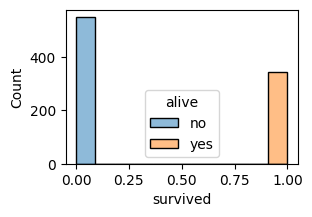

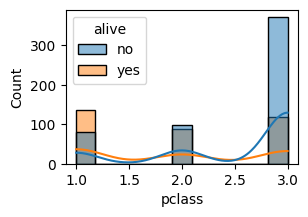

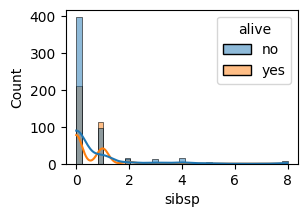

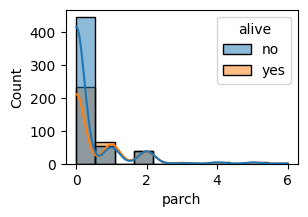

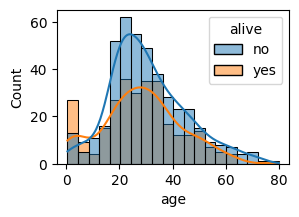

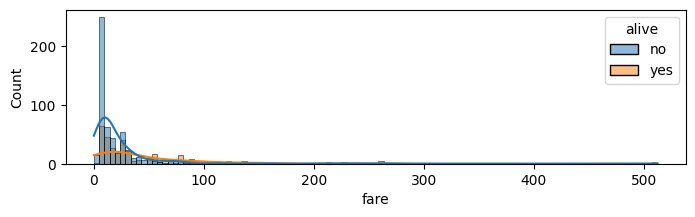

In [137]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['alive'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['alive'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['alive'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['alive'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['alive'],kde=True)
plt.show()
plt.figure(figsize=(8,2))
sns.histplot(x=df['fare'],hue=df['alive'],kde=True)
plt.show()

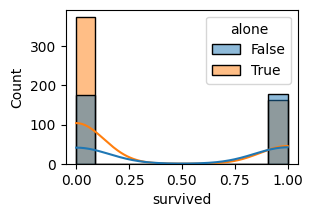

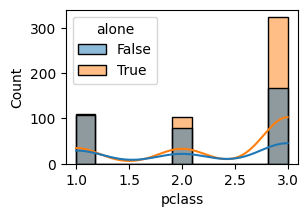

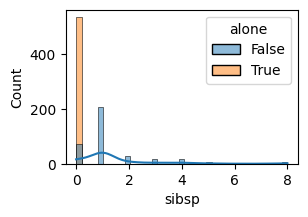

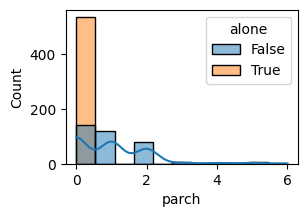

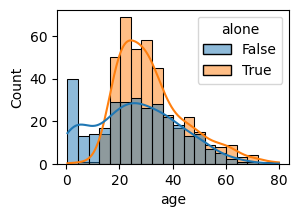

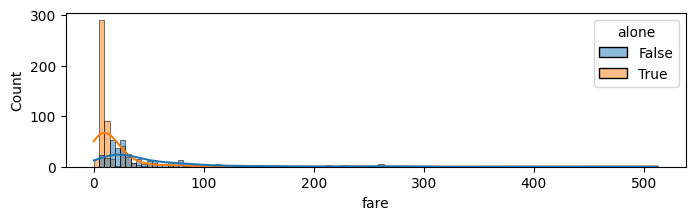

In [138]:
plt.figure(figsize=(3,2))
sns.histplot(x=df['survived'],hue=df['alone'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['pclass'],hue=df['alone'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['sibsp'],hue=df['alone'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['parch'],hue=df['alone'],kde=True)
plt.show()
plt.figure(figsize=(3,2))
sns.histplot(x=df['age'],hue=df['alone'],kde=True)
plt.show()
plt.figure(figsize=(8,2))
sns.histplot(x=df['fare'],hue=df['alone'],kde=True)
plt.show()

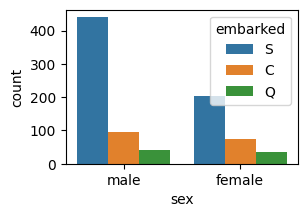

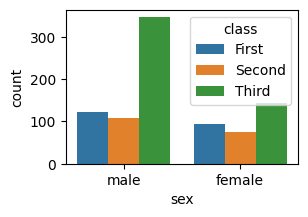

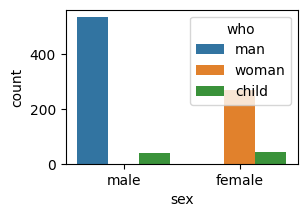

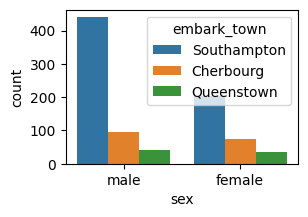

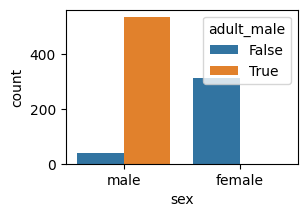

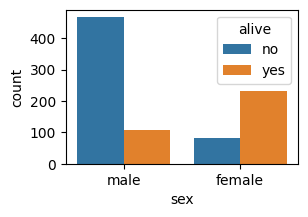

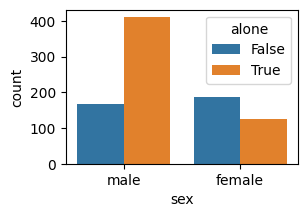

In [139]:
plt.figure(figsize=(3,2))
sns.countplot(x=df['sex'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['sex'],y=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['sex'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['sex'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['sex'],hue=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['sex'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['sex'],y=df['alone'])
plt.show()

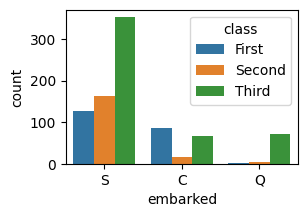

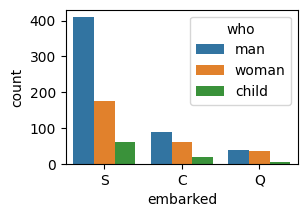

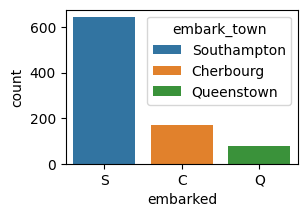

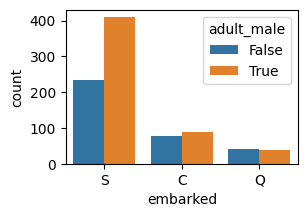

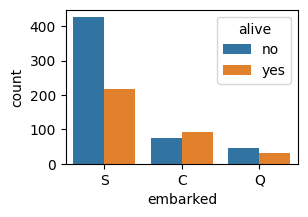

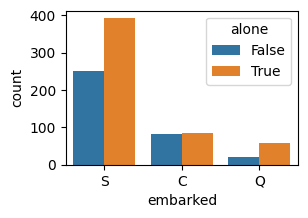

In [140]:

plt.figure(figsize=(3,2))
sns.countplot(x=df['embarked'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['embarked'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['embarked'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['embarked'],hue=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['embarked'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['embarked'],hue=df['alone'])
plt.show()

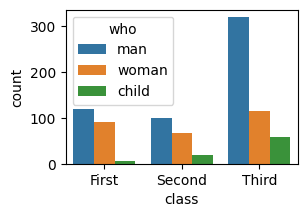

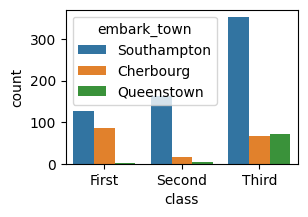

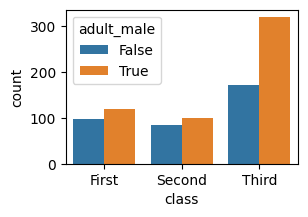

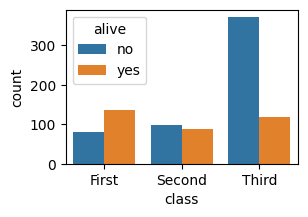

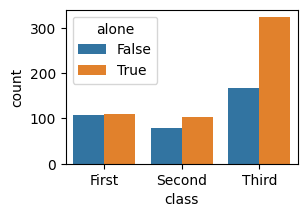

In [141]:

plt.figure(figsize=(3,2))
sns.countplot(x=df['class'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['class'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['class'],hue=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['class'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['class'],hue=df['alone'])
plt.show()

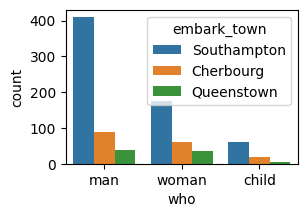

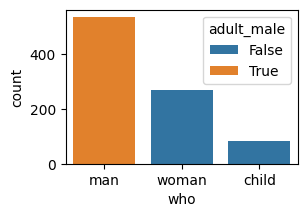

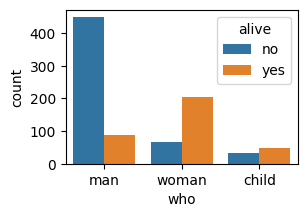

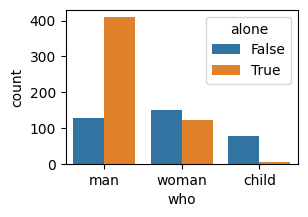

In [142]:

plt.figure(figsize=(3,2))
sns.countplot(x=df['who'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['who'],hue=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['who'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['who'],hue=df['alone'])
plt.show()

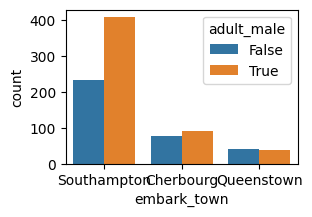

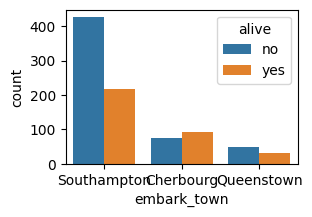

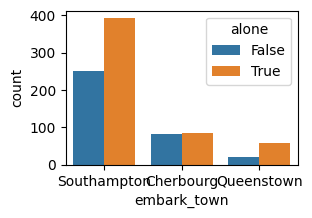

In [143]:

plt.figure(figsize=(3,2))
sns.countplot(x=df['embark_town'],hue=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['embark_town'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['embark_town'],hue=df['alone'])
plt.show()

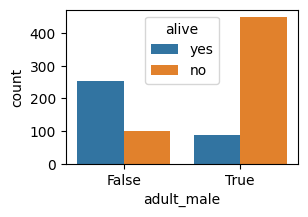

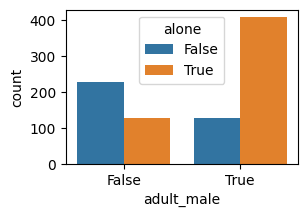

In [144]:

plt.figure(figsize=(3,2))
sns.countplot(x=df['adult_male'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.countplot(x=df['adult_male'],hue=df['alone'])
plt.show()

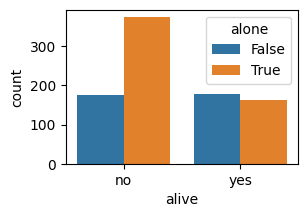

In [145]:

plt.figure(figsize=(3,2))
sns.countplot(x=df['alive'],hue=df['alone'])
plt.show()

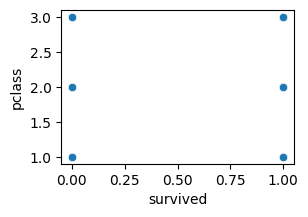

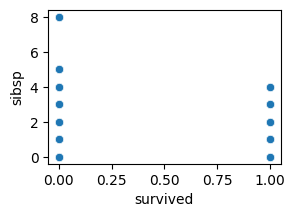

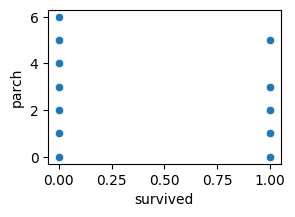

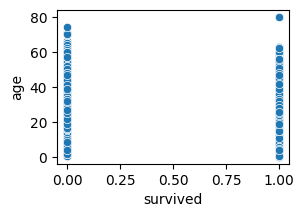

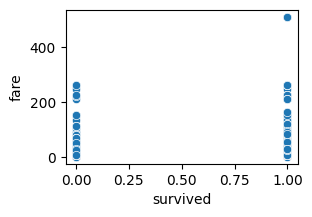

In [146]:
#bivariate
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['pclass'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['sibsp'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['parch'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['age'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['fare'])
plt.show()

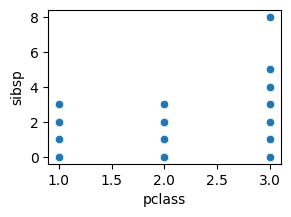

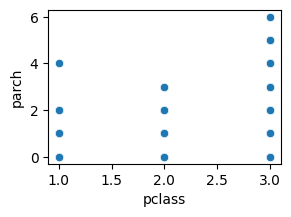

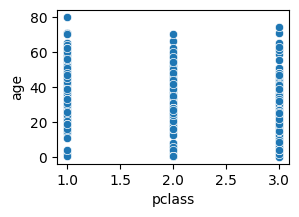

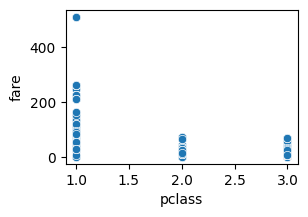

In [147]:
#bivariate
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['sibsp'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['parch'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['age'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['fare'])
plt.show()

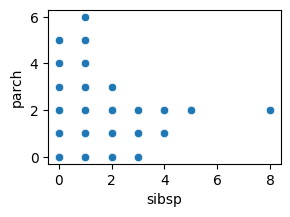

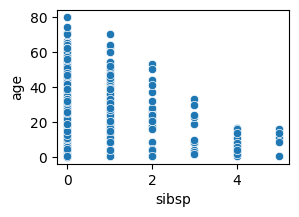

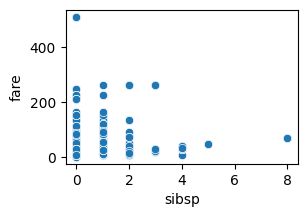

In [148]:
#bivariate

plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['parch'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['age'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['fare'])
plt.show()

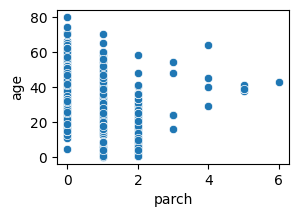

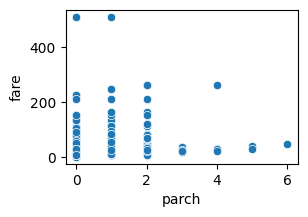

In [149]:
#bivariate

plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['age'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['fare'])
plt.show()

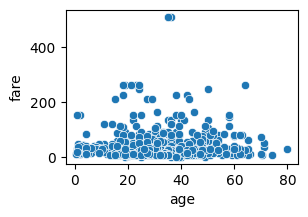

In [150]:

plt.figure(figsize=(3,2))
sns.scatterplot(x=df['age'],y=df['fare'])
plt.show()

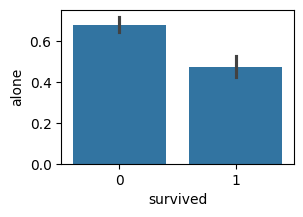

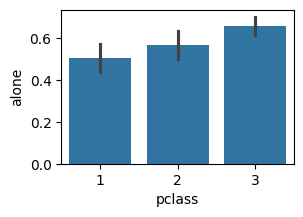

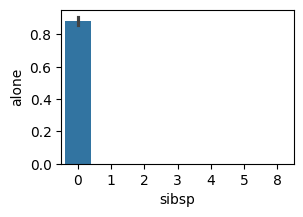

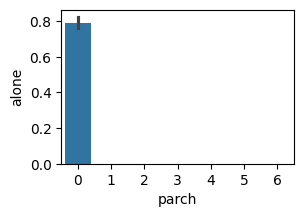

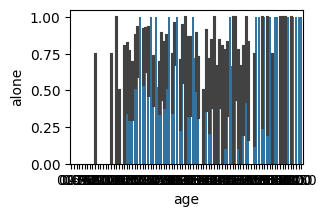

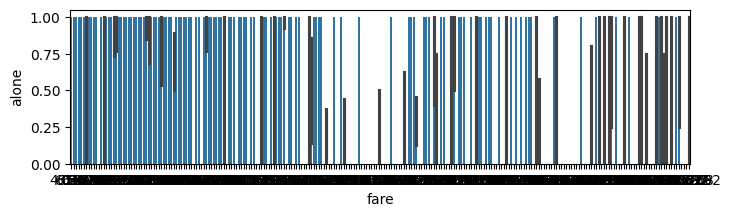

In [151]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['alone'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['alone'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['alone'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['alone'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['alone'],estimator='mean')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['alone'],estimator='mean')
plt.show()

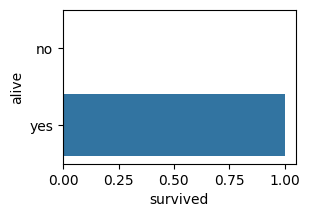

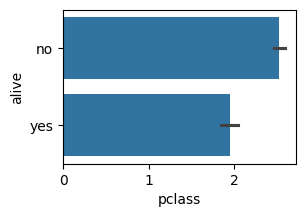

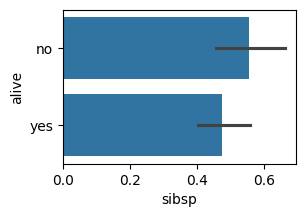

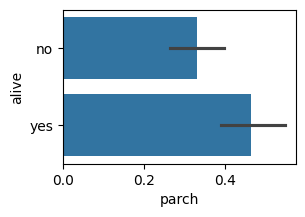

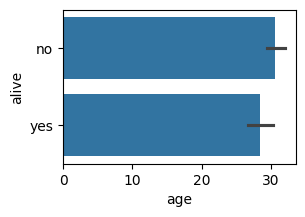

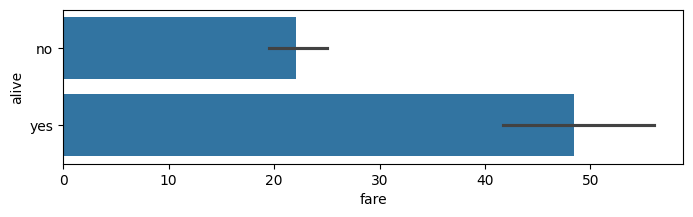

In [152]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['alive'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['alive'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['alive'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['alive'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['alive'],estimator='mean')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['alive'],estimator='mean')
plt.show()

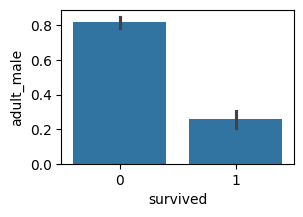

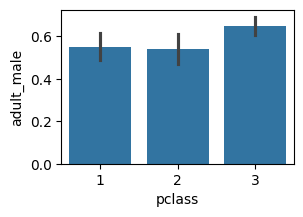

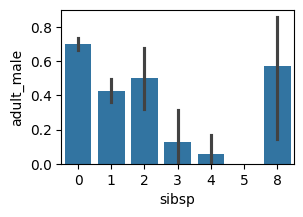

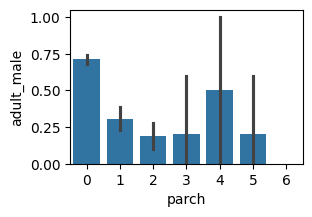

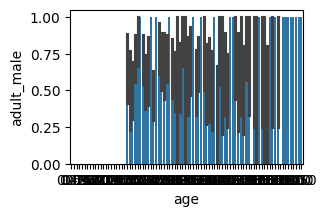

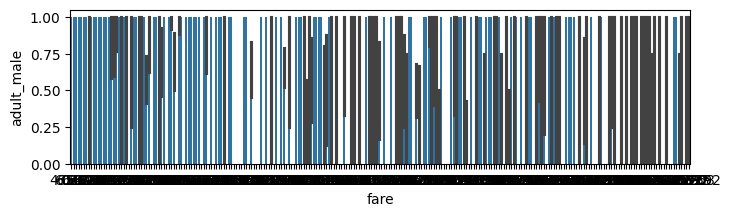

In [153]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['adult_male'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['adult_male'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['adult_male'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['adult_male'],estimator='mean')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['adult_male'],estimator='mean')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['adult_male'],estimator='mean')
plt.show()

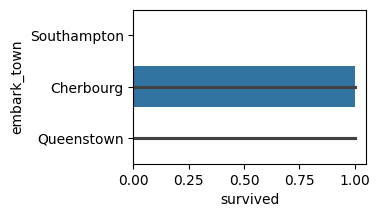

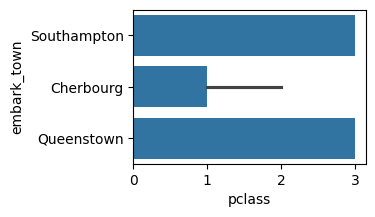

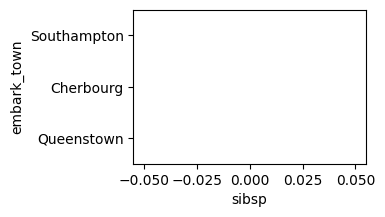

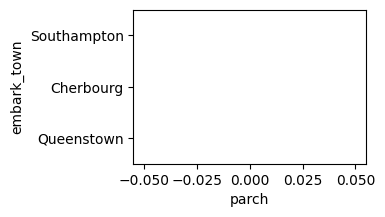

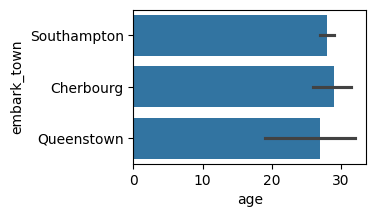

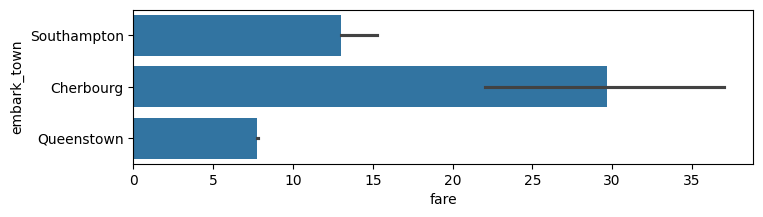

In [155]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['embark_town'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['embark_town'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['embark_town'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['embark_town'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['embark_town'],estimator='median')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['embark_town'],estimator='median')
plt.show()

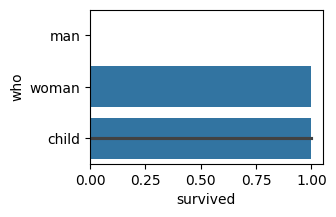

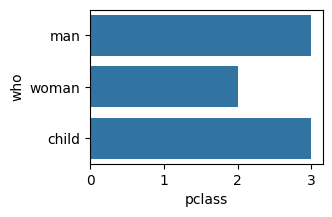

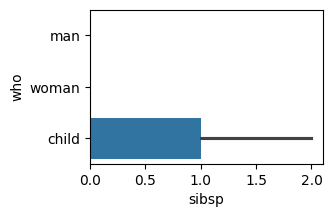

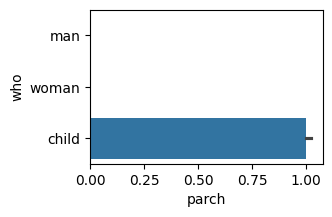

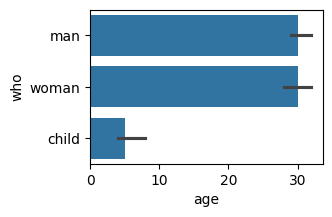

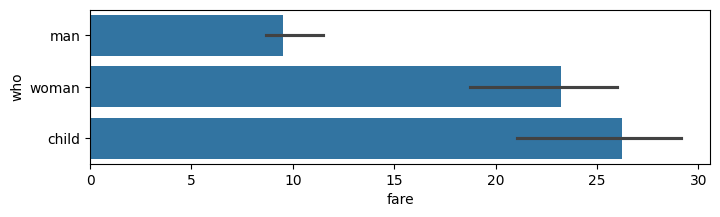

In [157]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['who'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['who'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['who'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['who'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['who'],estimator='median')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['who'],estimator='median')
plt.show()

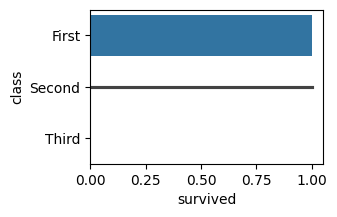

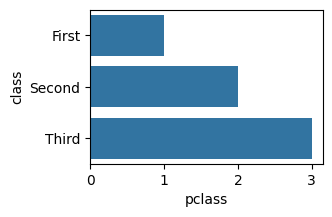

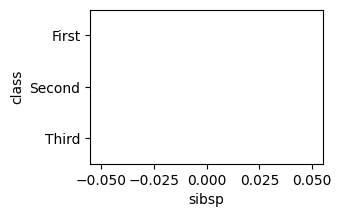

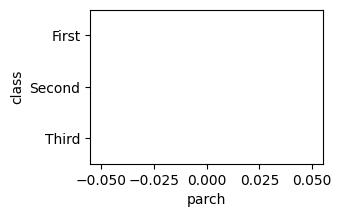

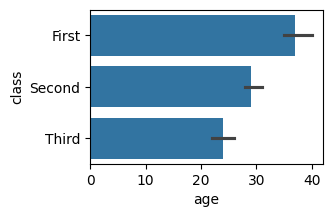

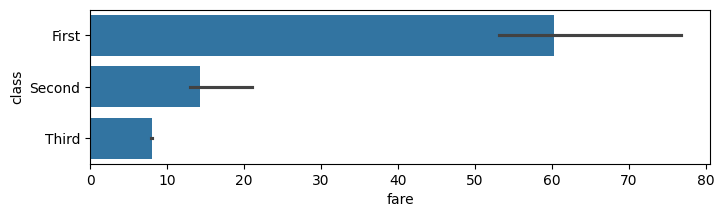

In [158]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['class'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['class'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['class'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['class'],estimator='median')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['class'],estimator='median')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['class'],estimator='median')
plt.show()

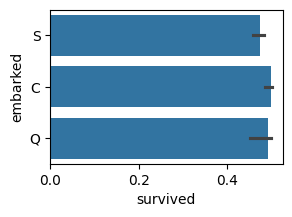

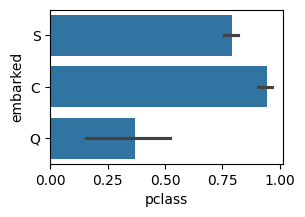

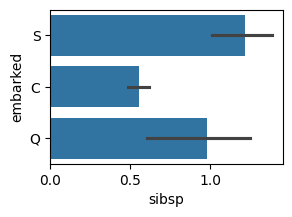

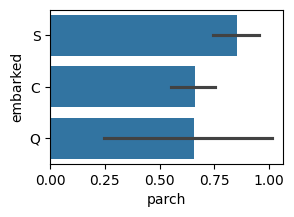

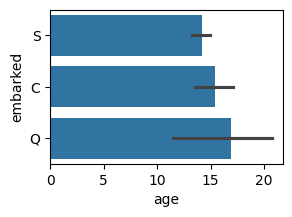

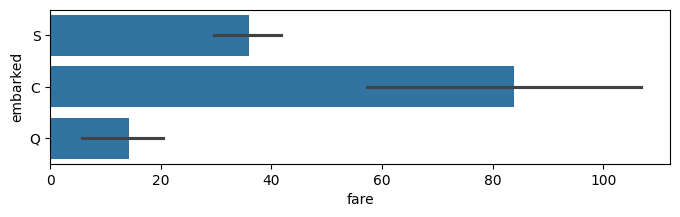

In [159]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['embarked'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['embarked'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['embarked'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['embarked'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['embarked'],estimator='std')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['embarked'],estimator='std')
plt.show()

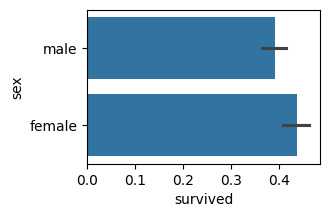

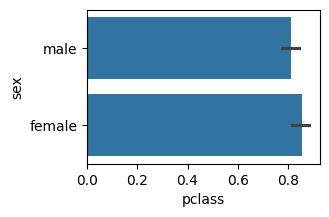

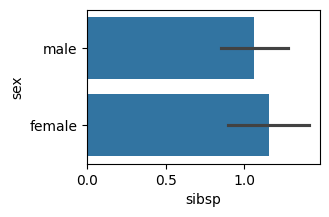

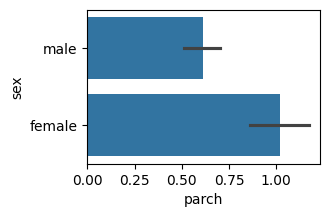

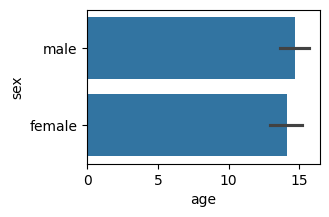

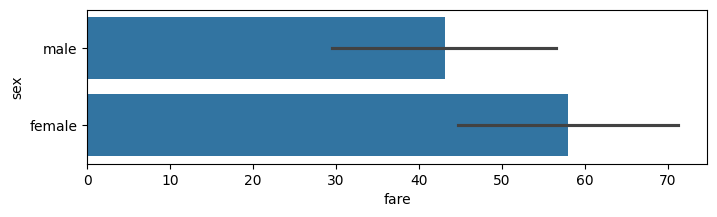

In [160]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['sex'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['pclass'],y=df['sex'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['sibsp'],y=df['sex'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['parch'],y=df['sex'],estimator='std')
plt.show()
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['sex'],estimator='std')
plt.show()
plt.figure(figsize=(8,2))
sns.barplot(x=df['fare'],y=df['sex'],estimator='std')
plt.show()

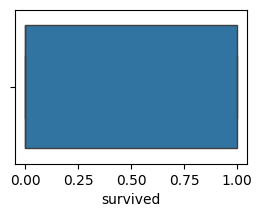

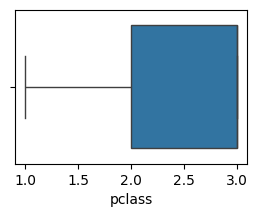

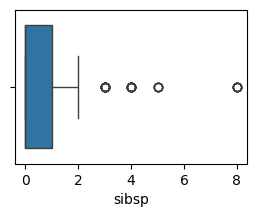

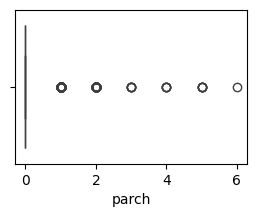

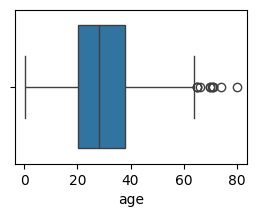

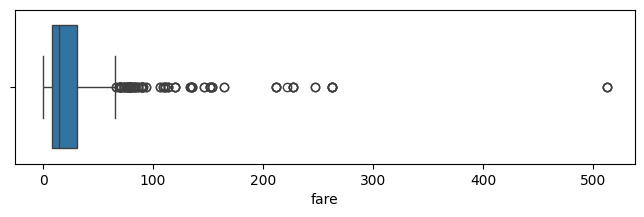

In [161]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'])
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'])
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'])
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'])
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'])
plt.show()
plt.figure(figsize=(8,2))
sns.boxplot(x=df['fare'])
plt.show()

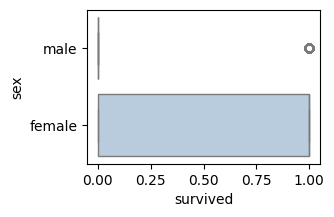

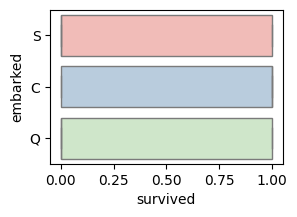

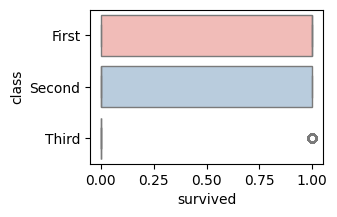

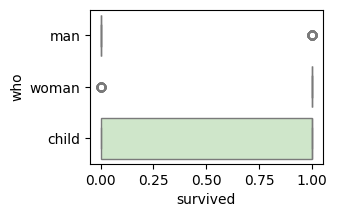

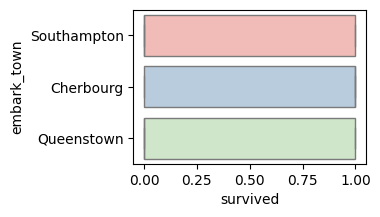

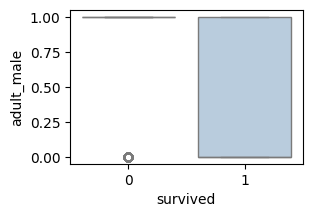

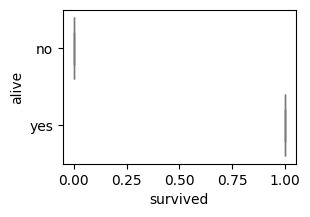

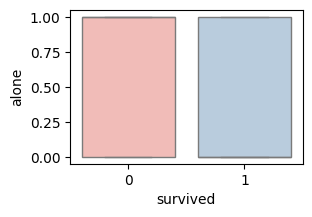

In [175]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['sex'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['embarked'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['class'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['who'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['embark_town'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['adult_male'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['alive'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['survived'],y=df['alone'],palette='Pastel1')
plt.show()

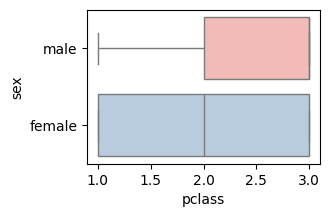

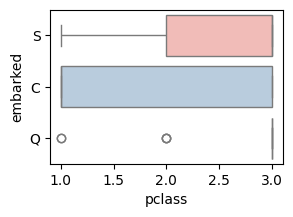

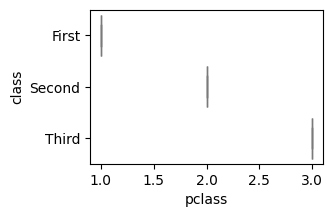

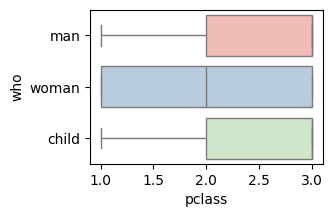

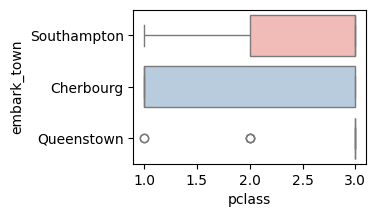

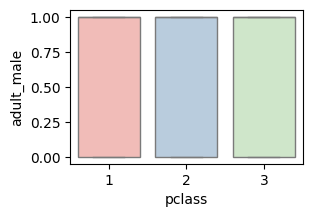

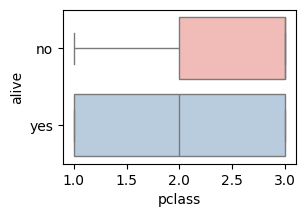

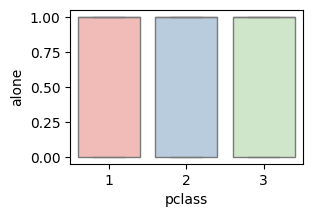

In [174]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['sex'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['embarked'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['class'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['who'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['embark_town'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['adult_male'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['alive'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['pclass'],y=df['alone'],palette='Pastel1')
plt.show()

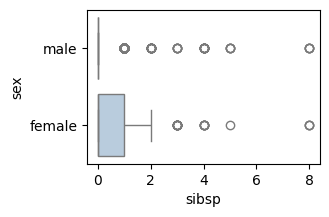

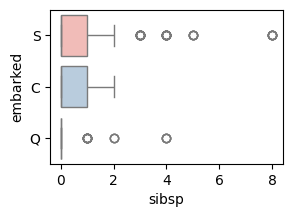

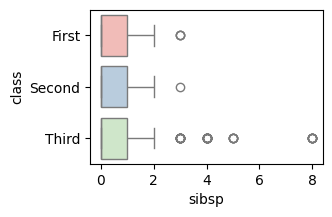

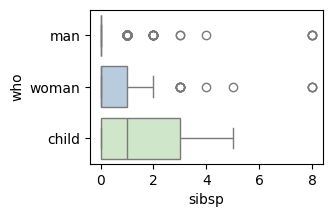

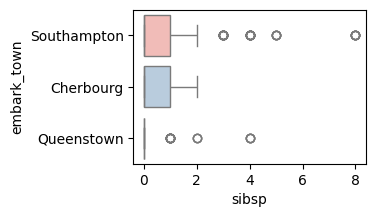

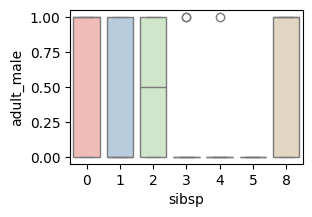

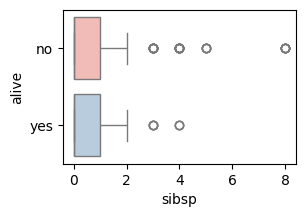

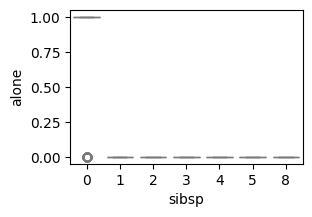

In [173]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['sex'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['embarked'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['class'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['who'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['embark_town'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['adult_male'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['alive'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['sibsp'],y=df['alone'],palette='Pastel1')
plt.show()

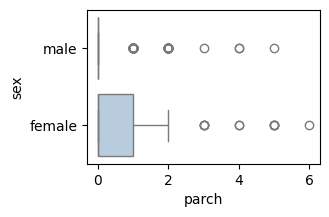

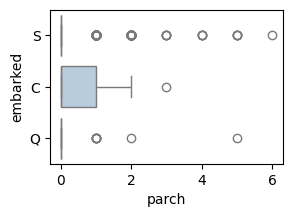

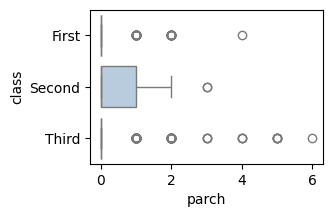

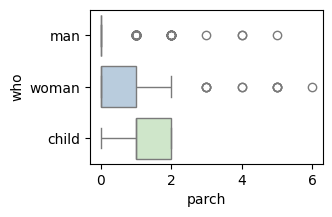

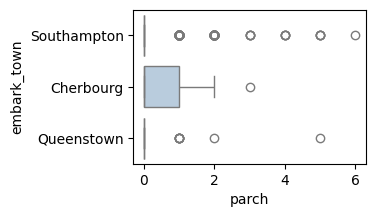

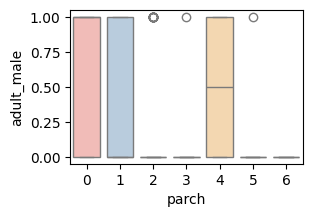

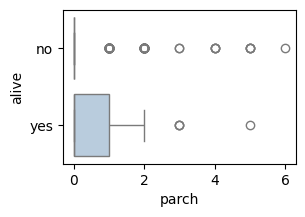

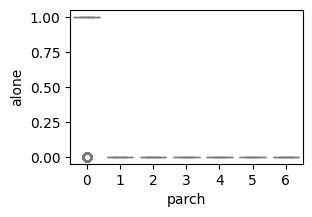

In [172]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['sex'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['embarked'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['class'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['who'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['embark_town'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['adult_male'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['alive'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['parch'],y=df['alone'],palette='Pastel1')
plt.show()

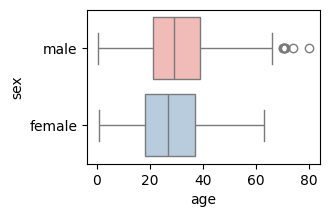

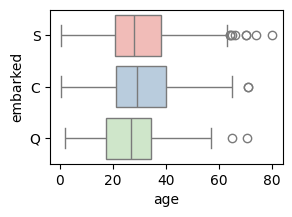

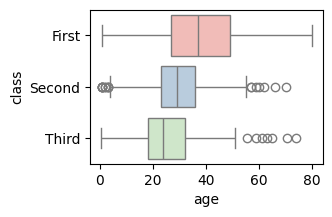

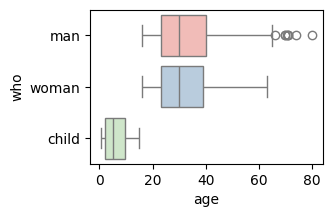

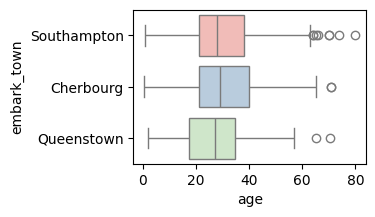

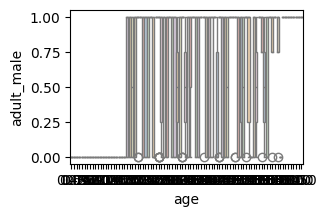

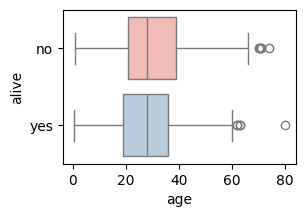

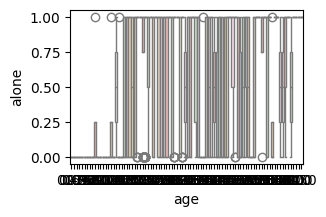

In [171]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['sex'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['embarked'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['class'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['who'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['embark_town'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['adult_male'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['alive'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['age'],y=df['alone'],palette='Pastel1')
plt.show()

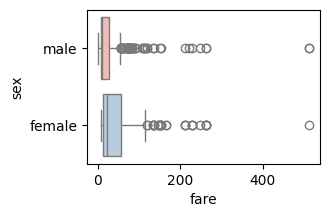

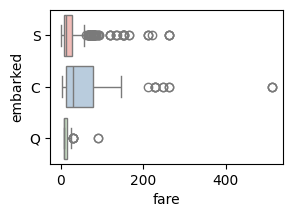

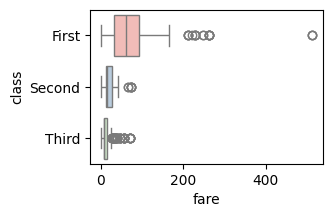

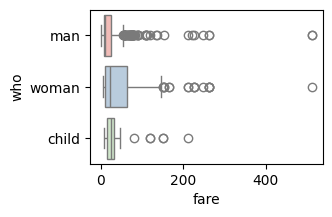

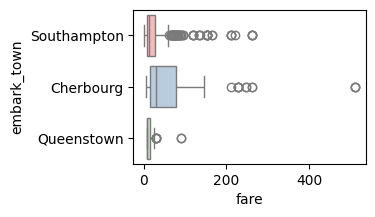

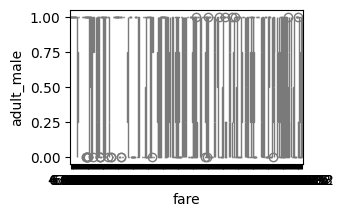

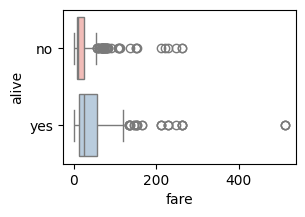

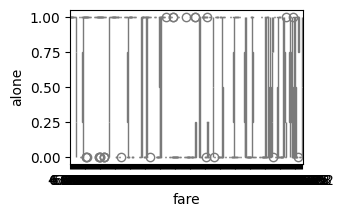

In [170]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['sex'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['embarked'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['class'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['who'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['embark_town'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['adult_male'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['alive'],palette='Pastel1')
plt.show()
plt.figure(figsize=(3,2))
sns.boxplot(x=df['fare'],y=df['alone'],palette='Pastel1')
plt.show()

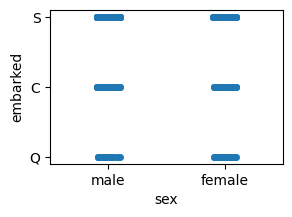

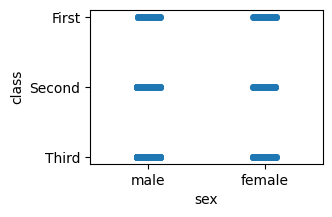

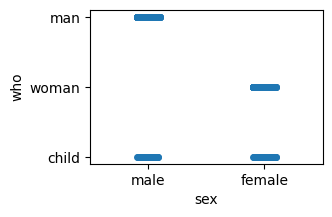

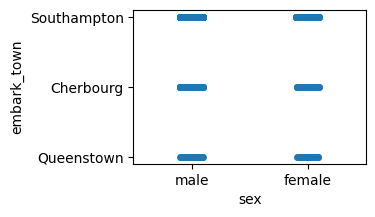

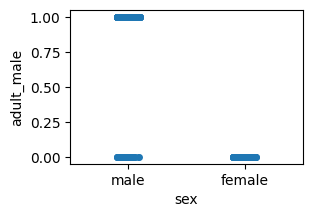

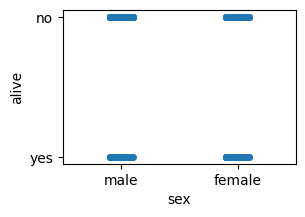

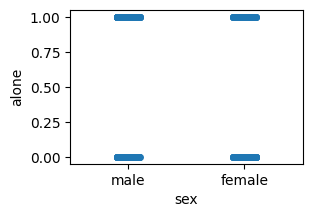

In [178]:
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'],y=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'],y=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'],y=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'],y=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'],y=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'],y=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['sex'],y=df['alone'])
plt.show()

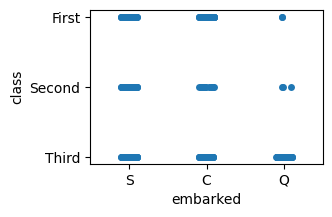

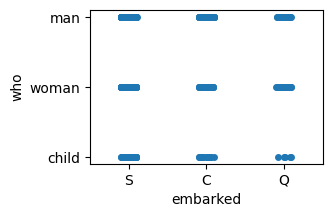

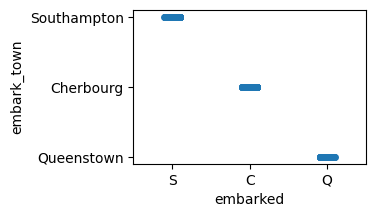

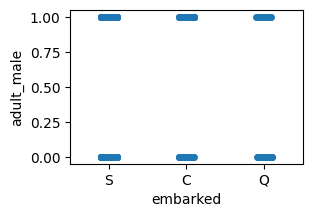

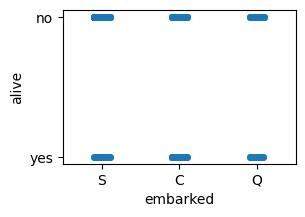

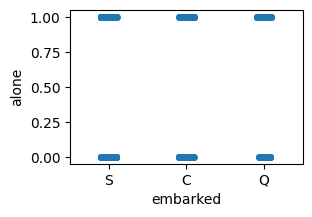

In [180]:

plt.figure(figsize=(3,2))
sns.stripplot(x=df['embarked'],y=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embarked'],y=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embarked'],y=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embarked'],y=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embarked'],y=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embarked'],y=df['alone'])
plt.show()

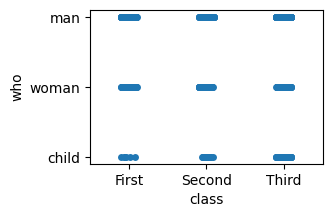

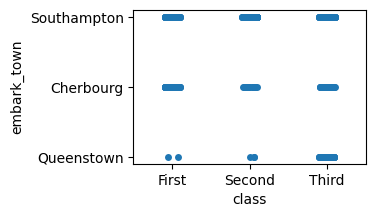

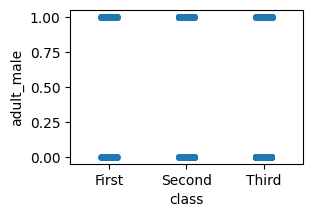

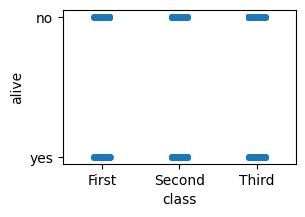

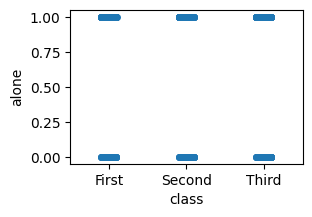

In [181]:
plt.figure(figsize=(3,2))
sns.stripplot(x=df['class'],y=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['class'],y=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['class'],y=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['class'],y=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['class'],y=df['alone'])
plt.show()

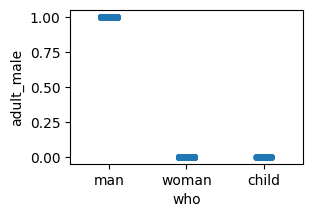

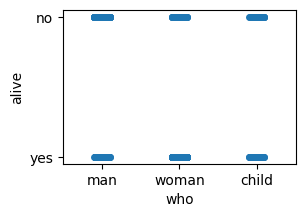

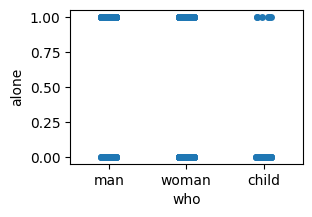

In [182]:
plt.figure(figsize=(3,2))
sns.stripplot(x=df['who'],y=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['who'],y=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['who'],y=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['who'],y=df['alone'])
plt.show()

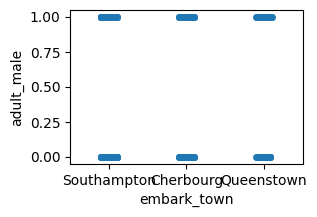

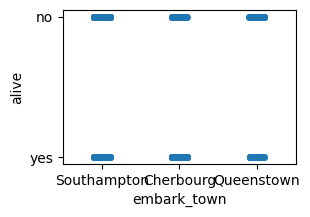

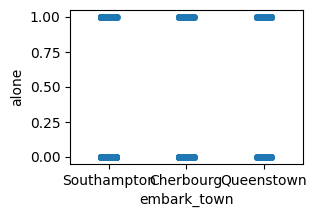

In [183]:
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embark_town'],y=df['adult_male'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embark_town'],y=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['embark_town'],y=df['alone'])
plt.show()

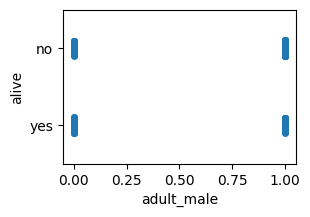

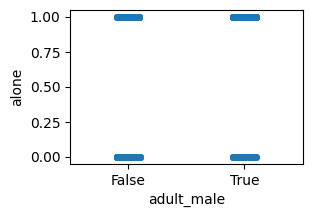

In [184]:
plt.figure(figsize=(3,2))
sns.stripplot(x=df['adult_male'],y=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.stripplot(x=df['adult_male'],y=df['alone'])
plt.show()

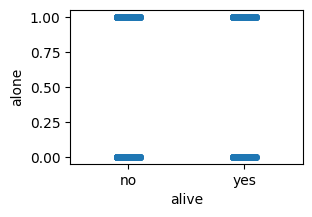

In [185]:

plt.figure(figsize=(3,2))
sns.stripplot(x=df['alive'],y=df['alone'])
plt.show()

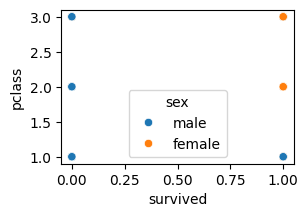

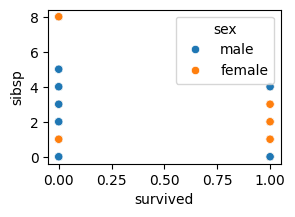

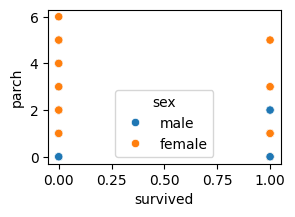

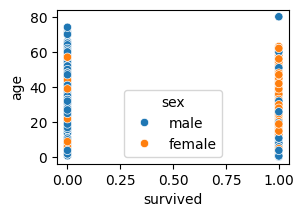

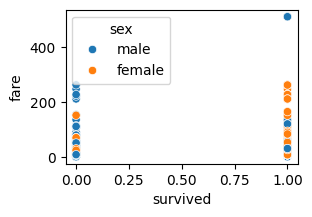

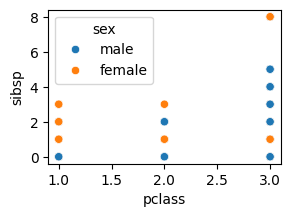

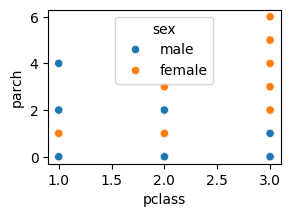

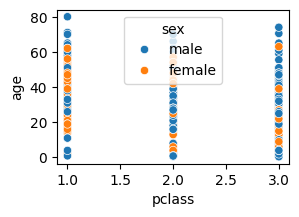

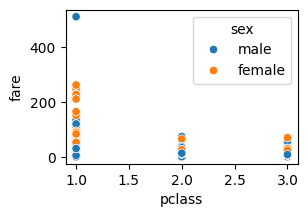

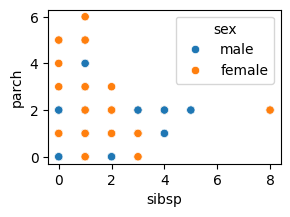

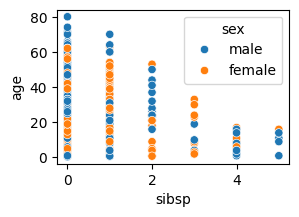

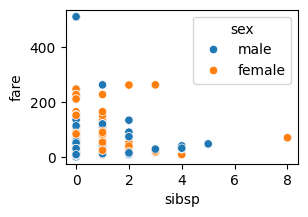

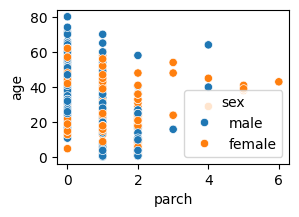

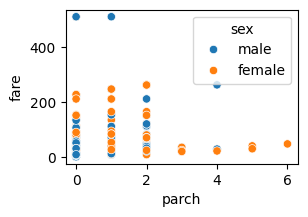

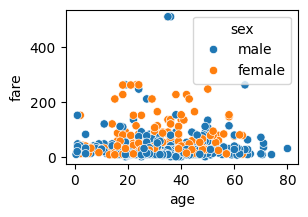

In [186]:
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['pclass'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['sibsp'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['parch'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['age'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['fare'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['sibsp'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['parch'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['age'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['fare'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['parch'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['age'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['fare'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['age'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['fare'],hue=df['sex'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['age'],y=df['fare'],hue=df['sex'])
plt.show()

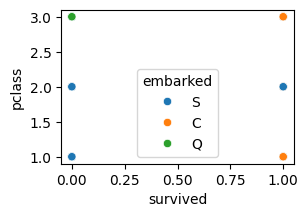

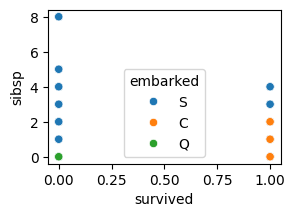

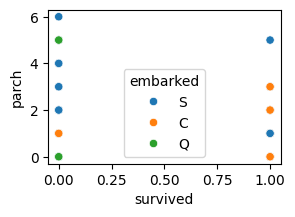

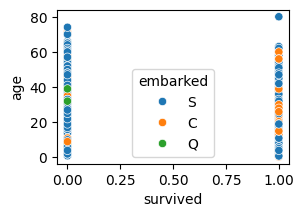

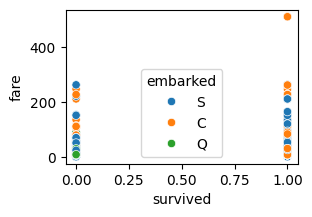

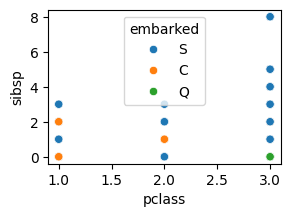

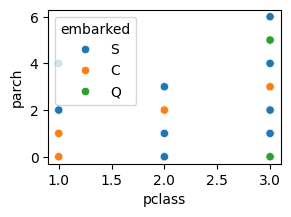

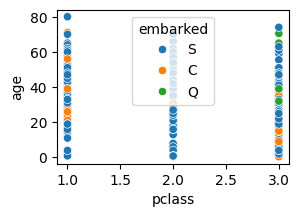

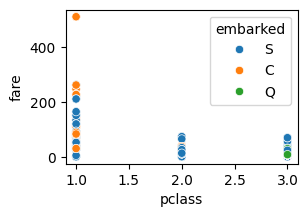

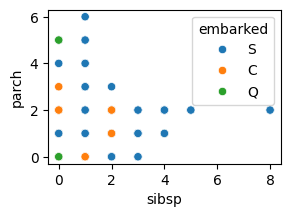

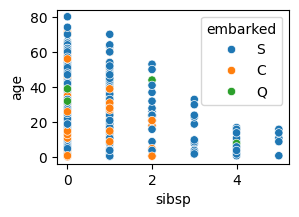

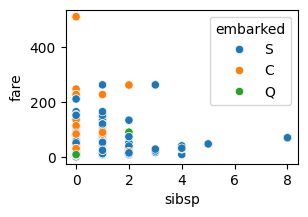

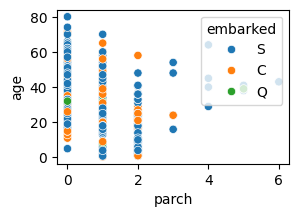

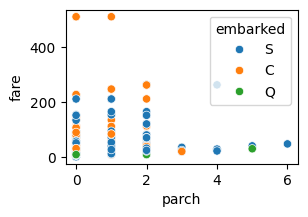

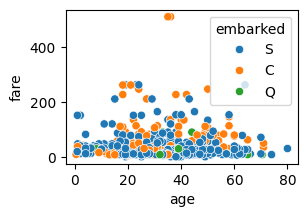

In [187]:
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['pclass'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['sibsp'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['parch'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['age'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['fare'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['sibsp'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['parch'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['age'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['fare'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['parch'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['age'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['fare'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['age'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['fare'],hue=df['embarked'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['age'],y=df['fare'],hue=df['embarked'])
plt.show()

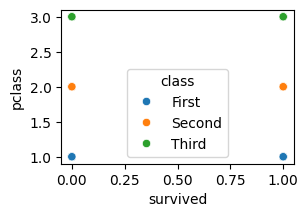

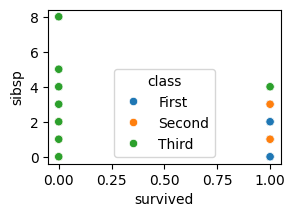

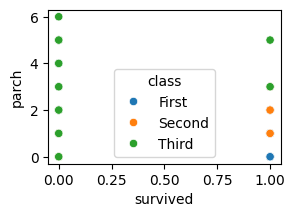

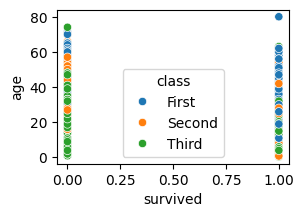

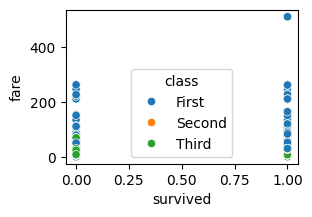

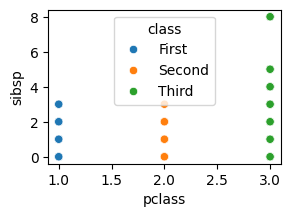

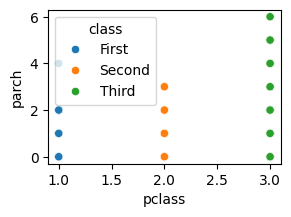

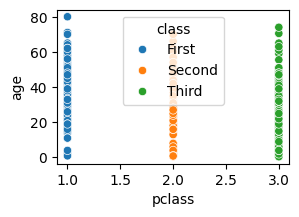

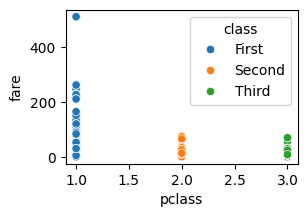

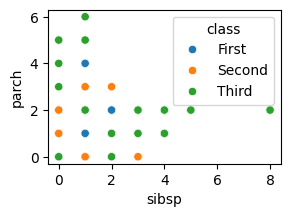

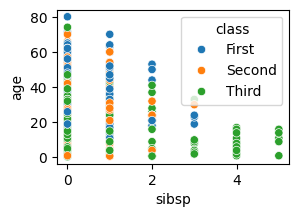

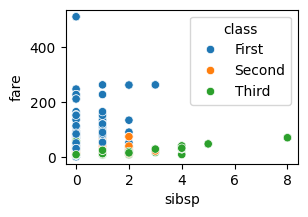

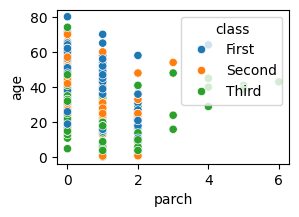

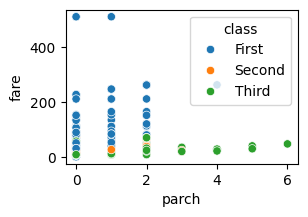

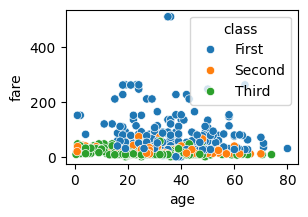

In [188]:
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['pclass'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['sibsp'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['parch'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['age'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['fare'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['sibsp'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['parch'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['age'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['fare'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['parch'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['age'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['fare'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['age'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['fare'],hue=df['class'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['age'],y=df['fare'],hue=df['class'])
plt.show()

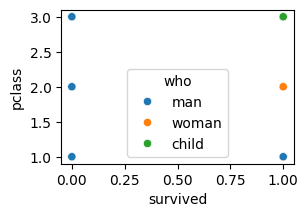

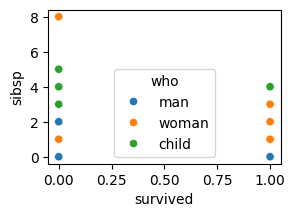

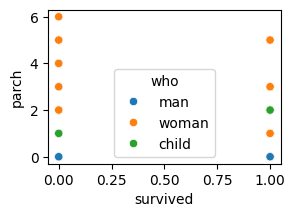

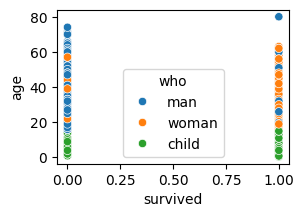

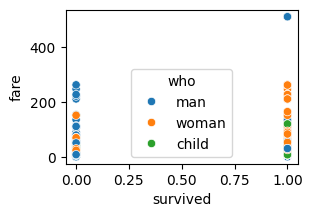

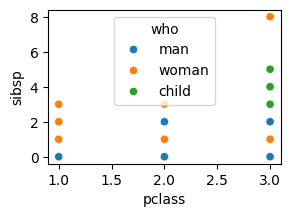

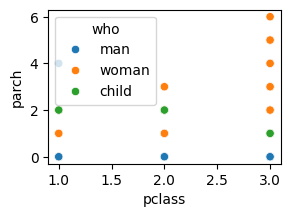

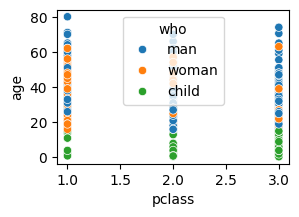

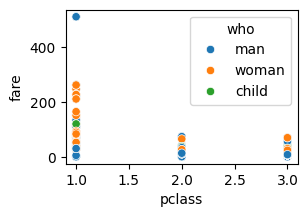

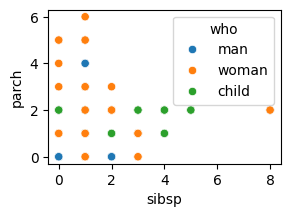

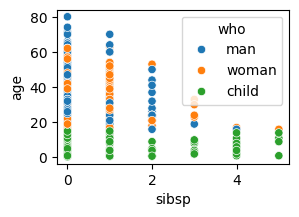

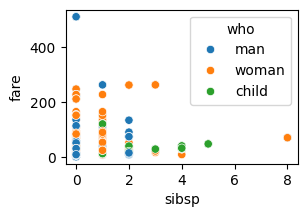

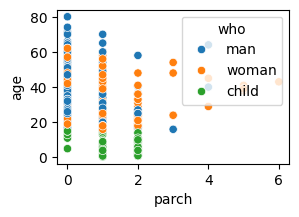

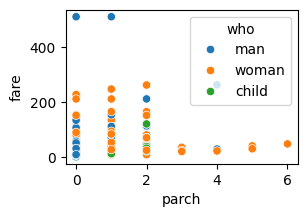

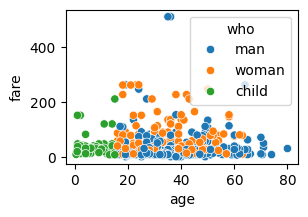

In [189]:
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['pclass'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['sibsp'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['parch'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['age'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['fare'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['sibsp'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['parch'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['age'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['fare'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['parch'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['age'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['fare'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['age'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['fare'],hue=df['who'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['age'],y=df['fare'],hue=df['who'])
plt.show()

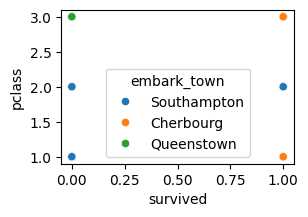

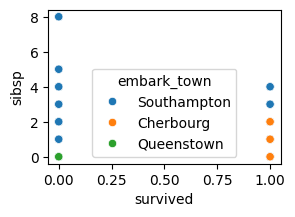

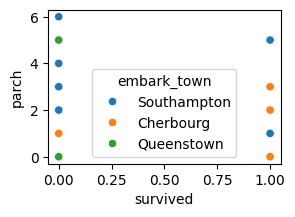

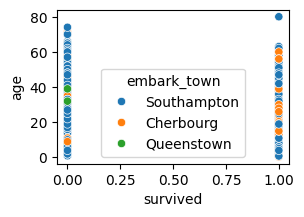

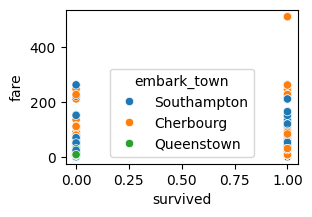

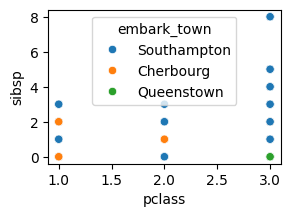

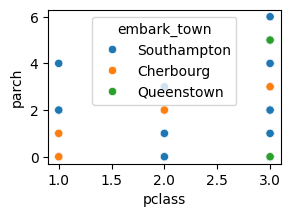

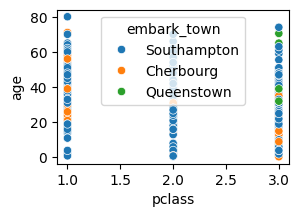

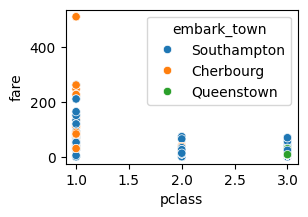

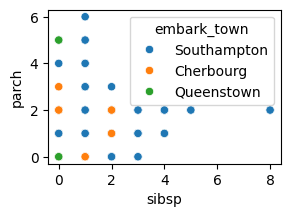

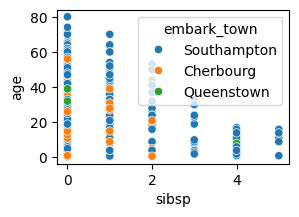

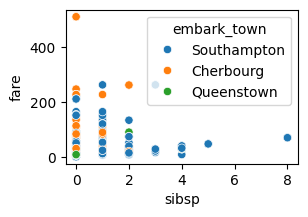

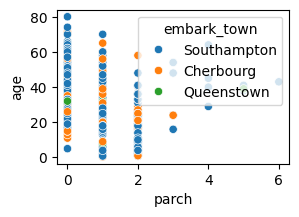

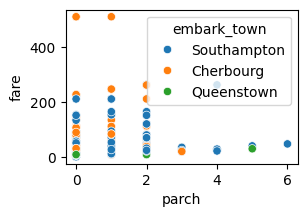

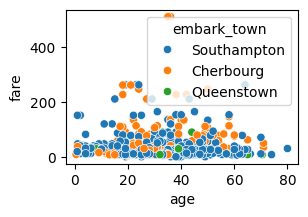

In [190]:
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['pclass'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['sibsp'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['parch'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['age'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['fare'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['sibsp'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['parch'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['age'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['fare'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['parch'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['age'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['fare'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['age'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['fare'],hue=df['embark_town'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['age'],y=df['fare'],hue=df['embark_town'])
plt.show()

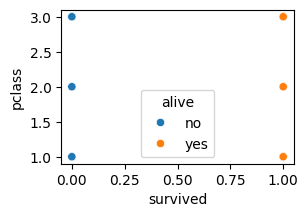

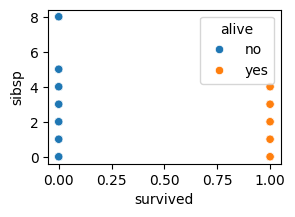

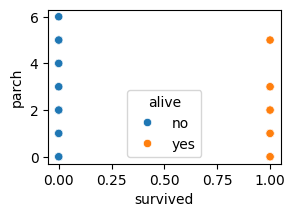

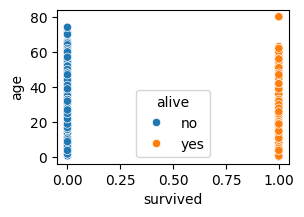

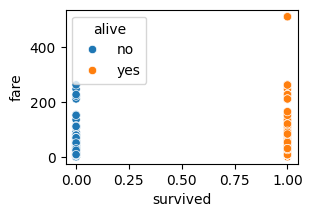

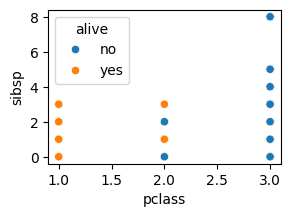

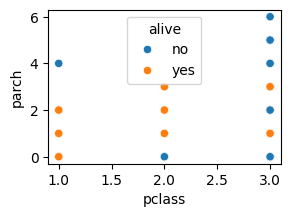

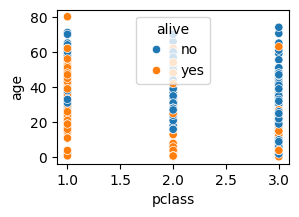

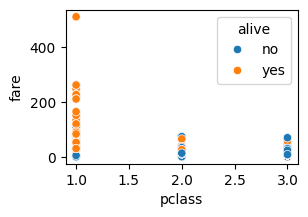

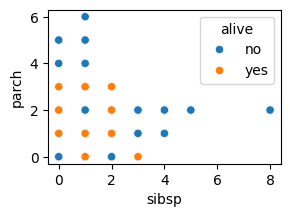

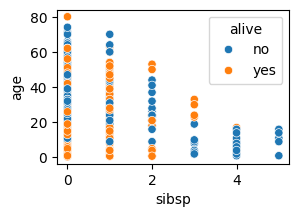

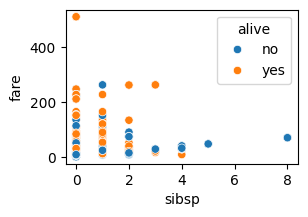

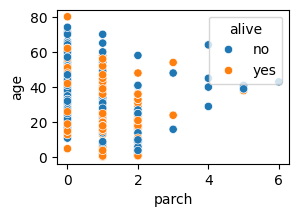

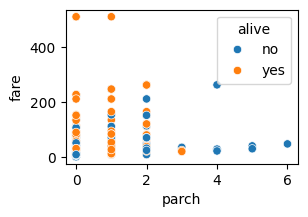

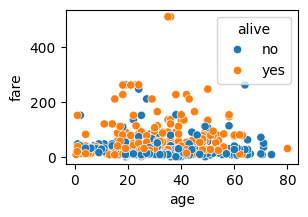

In [191]:
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['pclass'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['sibsp'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['parch'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['age'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['survived'],y=df['fare'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['sibsp'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['parch'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['age'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['pclass'],y=df['fare'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['parch'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['age'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['sibsp'],y=df['fare'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['age'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['parch'],y=df['fare'],hue=df['alive'])
plt.show()
plt.figure(figsize=(3,2))
sns.scatterplot(x=df['age'],y=df['fare'],hue=df['alive'])
plt.show()

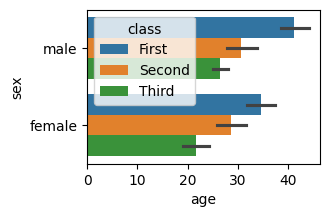

In [196]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['age'],y=df['sex'],hue=df['class'],dodge=True)
plt.show()

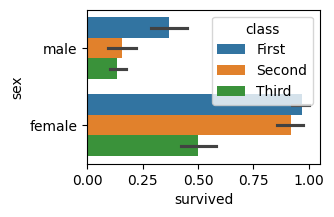

In [197]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['survived'],y=df['sex'],hue=df['class'],dodge=True)
plt.show()

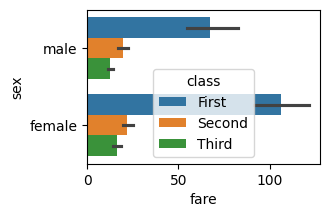

In [198]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['fare'],y=df['sex'],hue=df['class'],dodge=True)
plt.show()